In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\crime_data (1).csv')

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
np.unique(df['Unnamed: 0'])

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [5]:
df['Unnamed: 0'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45         

In [6]:
df1=df.drop('Unnamed: 0',axis=1)

In [7]:
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
kmeans=KMeans(n_clusters=6)

In [9]:
kmeans.fit(df1)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [10]:
kmeans.labels_

array([0, 0, 4, 5, 0, 5, 1, 0, 4, 5, 3, 1, 0, 1, 3, 1, 1, 0, 3, 4, 2, 0,
       3, 0, 5, 1, 1, 0, 3, 2, 0, 0, 4, 3, 1, 2, 2, 1, 2, 0, 3, 5, 5, 1,
       3, 2, 2, 3, 3, 2])

In [11]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5])

In [12]:
kmeans.cluster_centers_

array([[ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  5.75      , 156.75      ,  74.        ,  19.4       ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333]])

In [13]:
df1['cluster']=kmeans.labels_

In [14]:
df1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,5
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,5
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,5


## optimum value

In [15]:
kmeans.inertia_

18768.00066666667

In [16]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [17]:
inertia

[355945.74159999995,
 96536.67018062397,
 48063.1225,
 34807.48649999999,
 24447.880666666668,
 18883.464222222225,
 15750.0525,
 13739.913555555557,
 12064.171666666665,
 10163.609119047618]

Text(0.5, 1.0, 'optimum value of k')

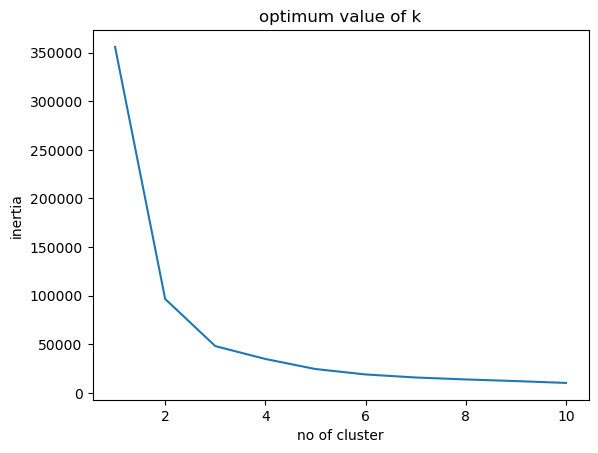

In [18]:
plt.plot(range(1,11),inertia)
plt.xlabel('no of cluster')
plt.ylabel('inertia')
plt.title('optimum value of k')